<a href="https://colab.research.google.com/github/edso2103/Cuadernos/blob/main/Parcial_vecinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> John Corredor, PhD.
<br>
<i><b>Asignatura:</b></i> Machine Learning en Computación Avanzada
<br>
<i><b>Estudiante:</b></i> Alejandro Sánchez, Gabriela Galindo, Sofía Orjuela
<br>
<i><b>Tema: </b></i>Parcial- K-nearest neighbors
<br>
<br>
26/04/21
<br>
</FONT>
</div>

<FONT FACE="times new roman" SIZE=4>**1. Análisis del dataset *wine*:**
 



<FONT FACE="times new roman" SIZE=4> En esta sección, por medio de diferentes consultas se desea obtener información acerca del dataset.
En este caso, aplicando los temas vistos en clase se implementó un dataset de juguete del módulo de scikit learn que consiste en datos para el reconocimiento de vinos, el cual cuenta con 3 clases, 178 instancias y 13 atributos

<FONT FACE="times new roman" SIZE=4>**1.1** Se importan las correspondientes bibliotecas

In [ ]:
import matplotlib.pyplot as plt
import numpy as np  
from collections import Counter
import math 
import pandas as pd

<FONT FACE="times new roman" SIZE=4>**1.2** Se usa un dataset de juguete sobre los vinos y se muestran las keys del dataset

In [ ]:
from sklearn.datasets import load_wine
wine=load_wine() 
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


<FONT FACE="times new roman" SIZE=4>**1.3** Se presenta la descripción del dataset

In [ ]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

<FONT FACE="times new roman" SIZE=4>**1.4** Por medio  del módulo de pandas se crea el dataframe y se muestran las cinco primeras filas

In [ ]:
wineDataframe=pd.DataFrame(wine.data,columns=wine.feature_names)
wineDataframe.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


<FONT FACE="times new roman" SIZE=4>**1.5** Se presentan las 13 características del dataset

In [ ]:
print(wine.feature_names) 

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


<FONT FACE="times new roman" SIZE=4>**1.6** Se presentan las 3 clases de vinos $target-names$

In [ ]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


<FONT FACE="times new roman" SIZE=4>**1.7** Se presentan la dimensión del dataset (178 filas y 13 columnas)

In [ ]:
wine.data.shape

(178, 13)

<FONT FACE="times new roman" SIZE=4>**1.8** Se presenta el número de datos de cada clase *(class_0, class_1 y class_2)*

In [ ]:
print({n: i for n,i in zip(wine.target_names,np.bincount(wine.target))})

{'class_0': 59, 'class_1': 71, 'class_2': 48}


<FONT FACE="times new roman" SIZE=4>**1.9** Se presenta el contenido del arreglo de clases *(target)*

In [ ]:
print("Contenido del array <target>: \n\n\n{}".format(wine['target']))

Contenido del array <target>: 


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


<FONT FACE="times new roman" SIZE=4>**2. Implementación del clasificador de Scikit-learn neighbors KNeighborsClassifier  :**
 


<FONT FACE="times new roman" SIZE=4> En esta sección se busca implementar el clasificador de Scikit-learn para la posterior comparación con el modelo implementado desde cero.

<FONT FACE="times new roman" SIZE=4>**2.1** Se dividen los datos en entrenamiento y de prueba *(train(80), test(20))* por medio del módulo de sklearn, *train_test_split*

In [ ]:
#set_size=0.2 para modificar el porcentaje para entrenar 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(wine['data'],
                                               wine['target'],
                                               test_size=0.2,
                                               random_state=0)

<FONT FACE="times new roman" SIZE=4>**2.2** Se presentan las dimensiones del train y del test (x,y)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(142, 13)
(142,)
(36, 13)
(36,)


<FONT FACE="times new roman" SIZE=4>**2.3** Se importa el módulo clasificador de vecinos más cercanos *(1 vecino)* y se ajusta el modelo *(fit)*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modeloKNN=KNeighborsClassifier(n_neighbors=1)
modeloKNN.fit(X_train,y_train)#ajustar el modelo

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

<FONT FACE="times new roman" SIZE=4>**2.4** Se muestran las predicciones sobre el conjunto de prueba


In [ ]:
print("Predicciones sobre el conjunto de entrenamiento")
print(modeloKNN.predict(X_test))

Predicciones sobre el conjunto de entrenamiento
[0 1 1 0 1 1 0 2 1 1 0 1 0 2 2 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 2 0 0 0]


<FONT FACE="times new roman" SIZE=4>**2.5** Se muestran los valores reales de las etiquetas

In [ ]:
print("Valores reales",y_test)

Valores reales [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]


<FONT FACE="times new roman" SIZE=4>**2.6** Se halla la precisión del modelo 

In [ ]:
score=modeloKNN.score(X_test,y_test)
round(score,3)
#Se presenta una precisión moderada

0.778

<FONT FACE="times new roman" SIZE=4>**3. Implementación del clasificador  KNN desde 0 :**

<FONT FACE="times new roman" SIZE=4> A continuación se desarrollará el clasificador de KNN desde cero, para lo cual se tendrá en cuenta la fórmula de la distancia Euclidiana

<FONT FACE="times new roman" SIZE=4>**3.1** Se crean las variable $X, y$ y se le asignan los valores correspondientes del dataset

In [ ]:
X= wine.data.astype(int)
y= wine.target.astype(int)

<FONT FACE="times new roman" SIZE=4>**3.2** Se divide el conjunto de datos de entrenamiento (80%) y de prueba (20%)


In [ ]:
np.random.seed(1)
msk = np.random.rand(len(wine.data)) < 0.8
train_x = X[msk]
test_x = X[~msk]
train_y = y[msk]
test_y = y[~msk]

<FONT FACE="times new roman" SIZE=4>**3.3** Se presentan las dimensiones del train y test *(x,y)*

In [ ]:
print("X train dimensión:{}".format(train_x.shape))
print("X test dimensión:{}".format(test_x.shape))
print("y train dimensión:{}".format(train_y.shape))
print("y test dimensión:{}".format(test_y.shape))


X train dimensión:(142, 13)
X test dimensión:(36, 13)
y train dimensión:(142,)
y test dimensión:(36,)


<FONT FACE="times new roman" SIZE=4>**3.4** Se elabora la clase $vecinos$ (1 vecino) con métodos de $aprendizaje$ y $clasificar$ para el desarrollo del método de vecinos más cercanos

In [ ]:
#Se realiza la clase vecinos
class vecinos():
  def __init__(self,k=3):
    self.k=k #constante global
  #Almacena los puntos y los relaciona con la clasificación de vinos 
  def aprendizaje (self,X_tr,y_tr): 
    self.X=X_tr
    self.y=y_tr
    self.n_puntos=X_tr.shape[0]
  
  #Se clasifican los datos de prueba (Aquellos que aún no conocen el modelo)
  def clasificar(self,X_ts):
    #Para almacenar las clases
    clasificacion=[] 
    for i in range (X_ts.shape[0]):
      distancia=np.empty(self.n_puntos)
      
      #Para cada punto se calcula su distancia Euclidiana
      for n in range (self.n_puntos): 
        distancia[n]=dEuclidiana(self.X[n],X_ts[i])
      
      #Distancias (vecinos) más cercanas, el metodo argsort ordena los elementos de un arreglo
      k_distancia=np.argsort(distancia)

      #Clasificación de los vinos
      k_etiqueta=self.y[k_distancia[:self.k]]

      #Etiqueta o clase más común, la que domina en la clasificación
      c=Counter(k_etiqueta).most_common(1)

      #Se agrega al vector de clasificación
      clasificacion.append(c[0][0])
    return clasificacion

#Aplicando la fórmula de la distancia Euclidiana:
def dEuclidiana(x,y):
  return np.sqrt(np.sum((x-y)**2))

#Aplicando los métodos
clasificador=vecinos(1)
clasificador.aprendizaje(train_x,train_y)
resulKNN=clasificador.clasificar(test_x)

#Comparación entre los modelos
print("Ejercicio con modelo desde cero    ",resulKNN)
print("Ejercicio con modelo de scikitlearn",modeloKNN.predict(test_x))




Ejercicio con modelo desde cero     [0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1]
Ejercicio con modelo de scikitlearn [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 2 2 1 2 2 2 2]


<FONT FACE="times new roman" SIZE=4>**3.5** Se realiza la respectiva gráfica

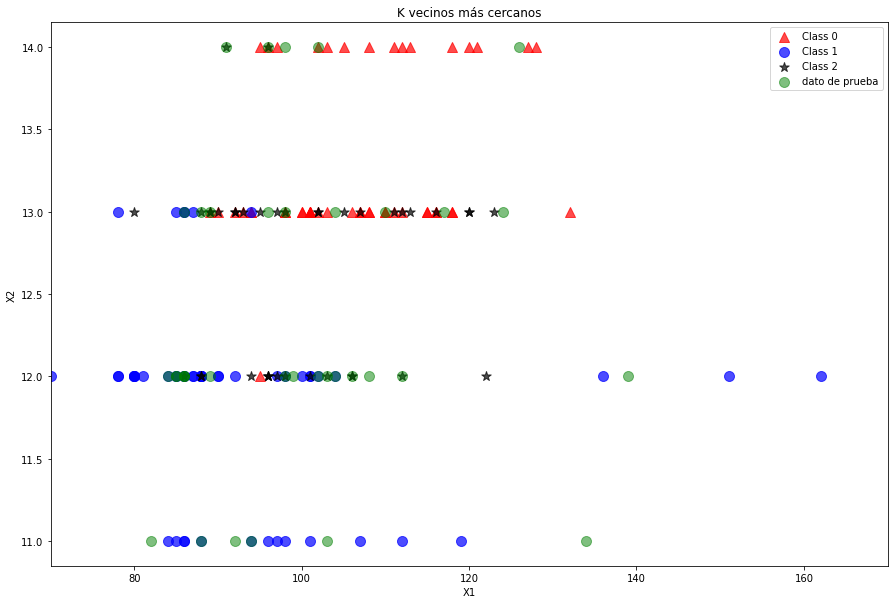

In [ ]:
labels = []
fig= plt.subplots(1,figsize=(15,10))
for i in range (train_x.shape[0]):
    if train_y[i]==0:
      marcar='^'
      color='red'
      label = 'Class 0'
    elif train_y[i]==1:
      marcar='o'
      color='blue'
      label = 'Class 1'
    else:
      marcar='*'
      color='black'
      label = 'Class 2'
    if labels.count(label) == 0:
       plt.scatter(x=train_x[i,4],y=train_x[i,0],c=color,s=100, marker=marcar, alpha = 0.7, label = label)
       labels.append(label)
    else:
       plt.scatter(x=train_x[i,4],y=train_x[i,0],c=color,s=100, marker=marcar, alpha = 0.7)

for i in range (test_x.shape[0]):
    label = 'dato de prueba'
    if labels.count(label) == 0:
      plt.scatter(x=test_x[i, 4],y=test_x[i,0],c='green',s=100, marker='o', alpha = 0.5, label = label)
      labels.append(label)
    else:
      plt.scatter(x=test_x[i, 4],y=test_x[i,0],c='green',s=100, marker='o', alpha = 0.5)

plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(70,170)
plt.legend()
plt.title("K vecinos más cercanos")
plt.show()

<FONT FACE="times new roman" SIZE=4>**3.6** Se comparan los resultados obtenidos para conocer su precisión

In [ ]:
print("La puntuación (score) del conjunto de pruebas de la predicción: {:.2f}".format(np.mean(resulKNN == test_y)))
#Se obtiene una precisión ligeramente buena

La puntuación (score) del conjunto de pruebas de la predicción: 0.67


<FONT FACE="times new roman" SIZE=4>**3.7** Por último se desea realizar comparaciones con modelo implementado desde cero y con KNeighborsClassifier, cambiando el número de vecinos 

In [ ]:
#Modelo con la biblioteca de sklearn
from sklearn.neighbors import KNeighborsClassifier
for k in range (1,6):
  modeloKNN=KNeighborsClassifier(n_neighbors=k)
  modeloKNN.fit(X_train,y_train)#ajustar el modelo
  score=modeloKNN.score(X_test,y_test)
  print("La puntuación con",k,"vecino(s) es de", round(score,3))

#La precisión aumenta con el número de vecinos

La puntuación con 1 vecino(s) es de 0.778
La puntuación con 2 vecino(s) es de 0.75
La puntuación con 3 vecino(s) es de 0.778
La puntuación con 4 vecino(s) es de 0.75
La puntuación con 5 vecino(s) es de 0.806


In [ ]:
#Modelo desde 0
for k in range (1,6):
  clasificador=vecinos(k)
  clasificador.aprendizaje(train_x,train_y)
  resulKNN=clasificador.clasificar(test_x)
  print("La puntuación con",k,"vecino(s) del conjunto de pruebas de la predicción: {:.2f}".format(np.mean(resulKNN == test_y)))

#La precisión es mejor con menos vecinos

#El algoritmo de K vecinos más cercanos es sencillo de implementar, pero es poco eficiente debido a que usa todos los datos para medir la 
#cercanía entre los puntos (distancia Euclidiana), razón por la que su precisión no es la mejor al tratarse de muchas características


La puntuación con 1 vecino(s) del conjunto de pruebas de la predicción: 0.67
La puntuación con 2 vecino(s) del conjunto de pruebas de la predicción: 0.67
La puntuación con 3 vecino(s) del conjunto de pruebas de la predicción: 0.64
La puntuación con 4 vecino(s) del conjunto de pruebas de la predicción: 0.61
La puntuación con 5 vecino(s) del conjunto de pruebas de la predicción: 0.58


<FONT FACE="times new roman" SIZE=4>**3.8** Se realizó un entrenamiento de los datos disminuyendo el número de características (de 13 a 5) 

In [ ]:
prob2 = np.array(wineDataframe[['alcohol', 'total_phenols', 'flavanoids', 'color_intensity','proline']])
np.random.seed(1)
msk = np.random.rand(len(wine.data)) < 0.8
train_x = prob2[msk]
test_x = prob2[~msk]
print("X train dimensión:{}".format(train_x.shape))
print("X test dimensión:{}".format(test_x.shape))

X train dimensión:(142, 5)
X test dimensión:(36, 5)


In [ ]:
#Con k = 2
clasificador=vecinos(2)
clasificador.aprendizaje(train_x,train_y)
resultado=np.array(clasificador.clasificar(test_x))
print("Resultado con 2 vecinos usando la segunda configuracion de modelo k vecinos: \n",resultado)
print("Valores reales: \n",np.array(test_y))
print("Precision del modelo: \n",str(round(np.mean(resultado == test_y),3)))

Resultado con 2 vecinos usando la segunda configuracion de modelo k vecinos: 
 [0 2 0 0 2 0 0 0 2 0 1 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 1 1]
Valores reales: 
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2]
Precision del modelo: 
 0.722


In [ ]:
#Probando diferentes valores de k
precision = []
for k in range (1,10):
  clasificador=vecinos(k)
  clasificador.aprendizaje(train_x,train_y)
  resulKNN=np.array(clasificador.clasificar(test_x))
  precision.append(round(np.mean(resulKNN == test_y),3))

print(precision)

[0.722, 0.722, 0.694, 0.611, 0.611, 0.611, 0.583, 0.583, 0.556]


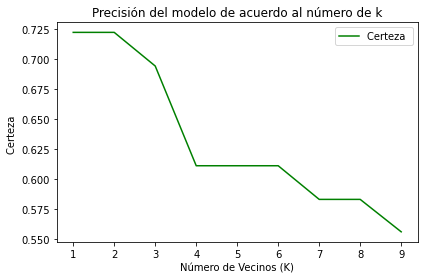

In [ ]:
#Mirando cual es el k mas preciso
plt.plot(range(1,10),precision,'g')
plt.title("Precisión del modelo de acuerdo al número de k")
plt.legend(('Certeza ', '+/- 3xstd'))
plt.ylabel('Certeza ')
plt.xlabel('Número de Vecinos (K)')
#tight_layout ajusta los parametros del grafico relacionados con la distribucion correcta de los ejes titulos
plt.tight_layout()
plt.show()

In [ ]:
precision = np.array(precision)
print( "La mejor aproximación de certeza fue con ", precision.max(), "con k=", precision.argmax()+1)

La mejor aproximación de certeza fue con  0.722 con k= 1


In [ ]:
#Concatenar los valores de y de entrenamiento con los resultados obtenidos mediante prediccion para graficar
resul = np.concatenate((train_y, resultado))
print(resul.shape)

(178,)


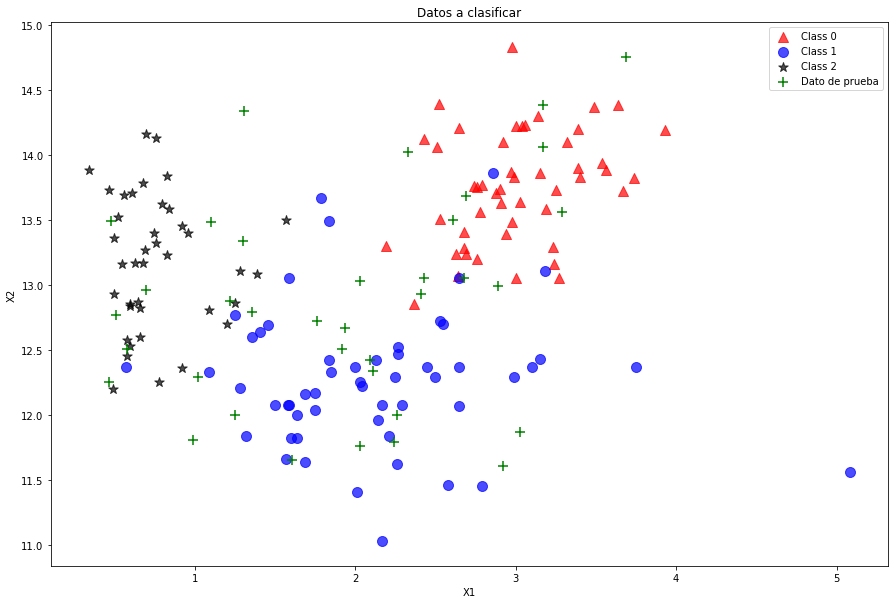

In [ ]:
labels = []
fig= plt.subplots(1,figsize=(15,10))
for i in range (train_x.shape[0]):
    if train_y[i]==0:
      marcar='^'
      color='red'
      label = 'Class 0'
    elif train_y[i]==1:
      marcar='o'
      color='blue'
      label = 'Class 1'
    else:
      marcar='*'
      color='black'
      label = 'Class 2'
    if labels.count(label) == 0:
       plt.scatter(x=train_x[i,2],y=train_x[i,0],c=color,s=100, marker=marcar, alpha = 0.7, label = label)
       labels.append(label)
    else:
       plt.scatter(x=train_x[i,2],y=train_x[i,0],c=color,s=100, marker=marcar, alpha = 0.7)

for i in range (test_x.shape[0]):
    label = 'Dato de prueba'
    if labels.count(label) == 0:
      plt.scatter(x=test_x[i, 2],y=test_x[i,0],c='green',s=100, marker='+', label = label)
      labels.append(label)
    else:
      plt.scatter(x=test_x[i, 2],y=test_x[i,0],c='green',s=100, marker='+')

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Datos a clasificar")
plt.show()

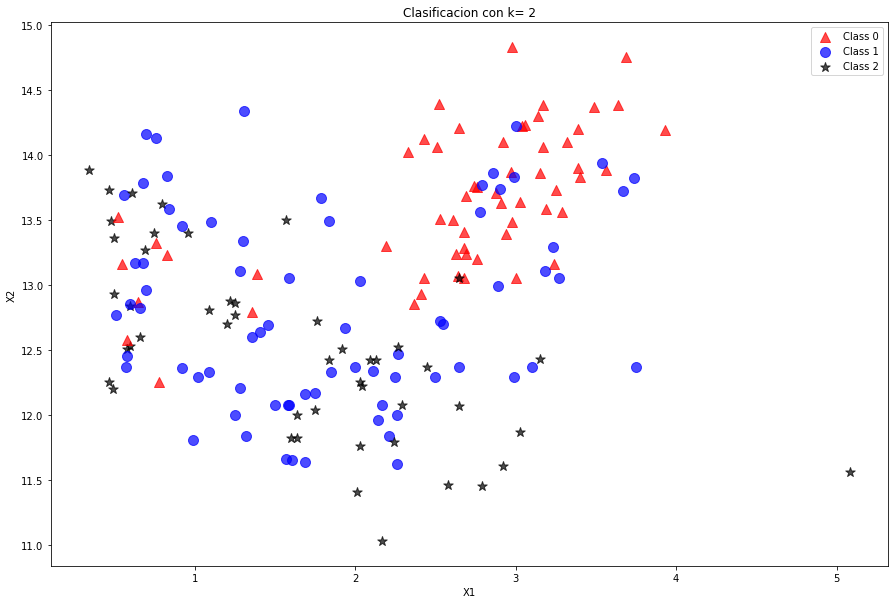

In [ ]:
labels = []
fig= plt.subplots(1,figsize=(15,10))
for i in range (prob2.shape[0]):
    if resul[i]==0:
      marcar='^'
      color='red'
      label = 'Class 0'
    elif  resul[i]==1:
      marcar='o'
      color='blue'
      label = 'Class 1'
    else:
      marcar='*'
      color='black'
      label = 'Class 2'
    if labels.count(label) == 0:
       plt.scatter(x=prob2[i,2],y=prob2[i,0],c=color,s=100, marker=marcar, alpha = 0.7, label = label)
       labels.append(label)
    else:
       plt.scatter(x=prob2[i,2],y=prob2[i,0],c=color,s=100, marker=marcar, alpha = 0.7)

plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.title("Clasificacion con k= 2")
plt.show()
#En definitiva vemos como al disminuir el numero de caracteristicas para entrenar el modelo, este da un resultado más efectivo 